In [1]:
#Importing the necessary libraries
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
OriginalData = pd.read_csv("F:/Practical Data Science/Assignment 2/Dataset/glass.csv")  #Loading the dataset

In [3]:
print(OriginalData.columns)       #Printing the columns from the dataset

Index(['Id_number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')


In [4]:
df = pd.DataFrame(OriginalData)   #Converting into dataframe for further analysis

In [5]:
df.describe()   

Id_number          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type_of_glass  
count  214.000000  214.000000  214.000000  214.000000     214.000000  
mean     0.497056    8.956963    0.175047    0.057009       2.780374  
std      0.652192    1.423153    0.497219    0.097439       2.103739  
min      0.000000    5.430000    0.000000    0.000000       1.000000  
25%      0.122500    8.240000    0.000000    0.000000       1.000000  
50%      0.555000    8.600000    0.000000    0.000000       2.000000  
75%      0.610000    9.172500    0.000000    0.100000       3.000000  
max      6.210000   16.190000    3.150000    0.510000       7.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
df['Type_of_glass'].value_counts()        #Displaying the count of each type of glass

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [8]:
df = df.dropna()     # removing the rows having empty values

In [9]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)            

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64


Each column in the dataset appears necessary as they all pertain to the composition of the glass samples and their respective types. However, if there are any columns that don't contribute to the analysis, they can be dropped. In this case, the Id_number column may be unnecessary for analysis.

In [10]:
df = df.drop(columns=['Id_number'])

In [11]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'], dtype='object')

In [12]:
#Removing outliers using z-scores method
def remove_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df.copy()
    outliers = np.zeros(df.shape[0], dtype=bool)  # Initialize a boolean mask
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        outliers |= (z_scores > threshold)  # Updating mask with outliers
    df_cleaned = df_cleaned[~outliers]
    return df_cleaned

# Defining columns for which i want to remove outliers
columns_to_check = ['RI', 'Na', 'Mg','Al','Si','K','Ca','Ba','Fe']  # Replace with actual column names

# Removing outliers using z-scores
cleaned_data = remove_outliers_zscore(df, columns_to_check)

# Printing the cleaned dataset
print("Cleaned Data:")
print(cleaned_data)

Cleaned Data:
          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type_of_glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
208  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0              7
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7

[194 rows x 10 columns]


In [13]:
cleaned_data.shape

(194, 10)

In [14]:
cleaned_data

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type_of_glass
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0              1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0              1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...            ...
208  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0              7
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0              7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0              7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0              7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0              7

[194 rows x 10 columns]

In [15]:
df=cleaned_data

## Task 2.1

Descriptive statistics for RI:
 count    194.000000
mean       1.518062
std        0.002288
min        1.511310
25%        1.516513
50%        1.517635
75%        1.518995
max        1.527250
Name: RI, dtype: float64 



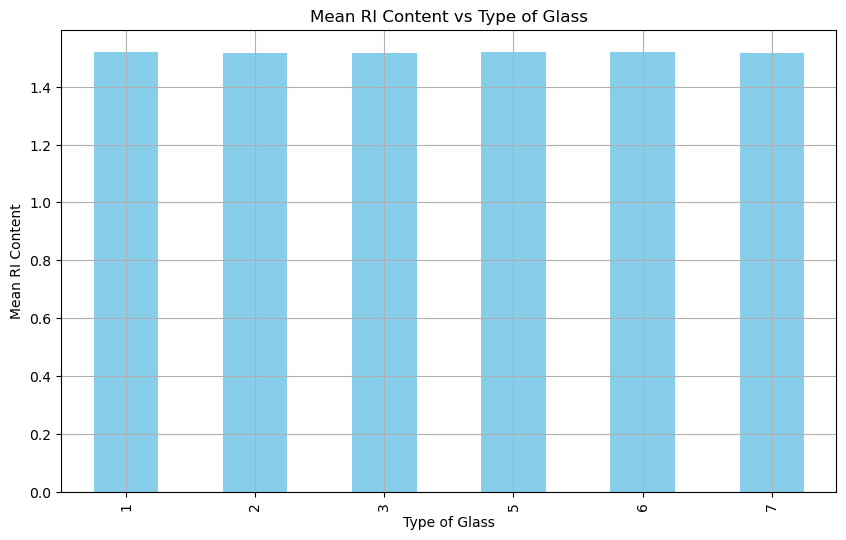

Descriptive statistics for Na:
 count    194.000000
mean      13.416959
std        0.673292
min       11.030000
25%       12.945000
50%       13.305000
75%       13.787500
max       15.150000
Name: Na, dtype: float64 



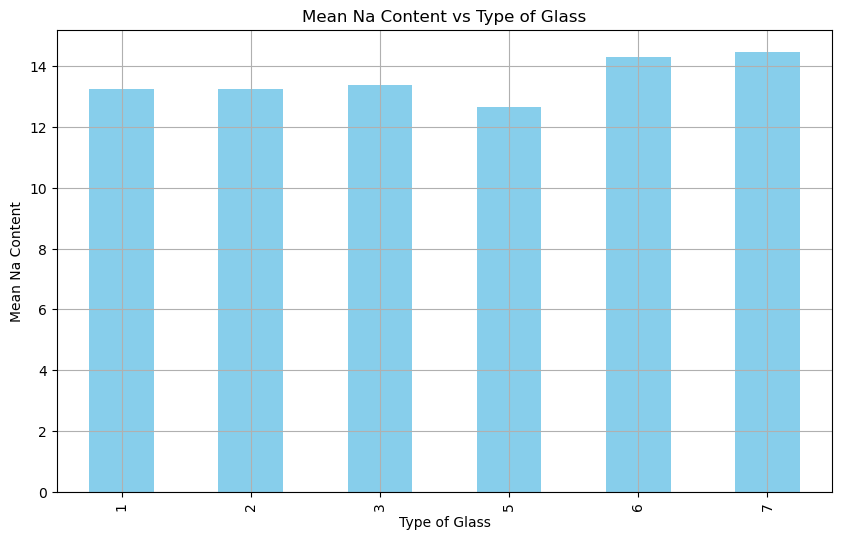

Descriptive statistics for Mg:
 count    194.000000
mean       2.880000
std        1.308715
min        0.000000
25%        2.855000
50%        3.500000
75%        3.610000
max        4.490000
Name: Mg, dtype: float64 



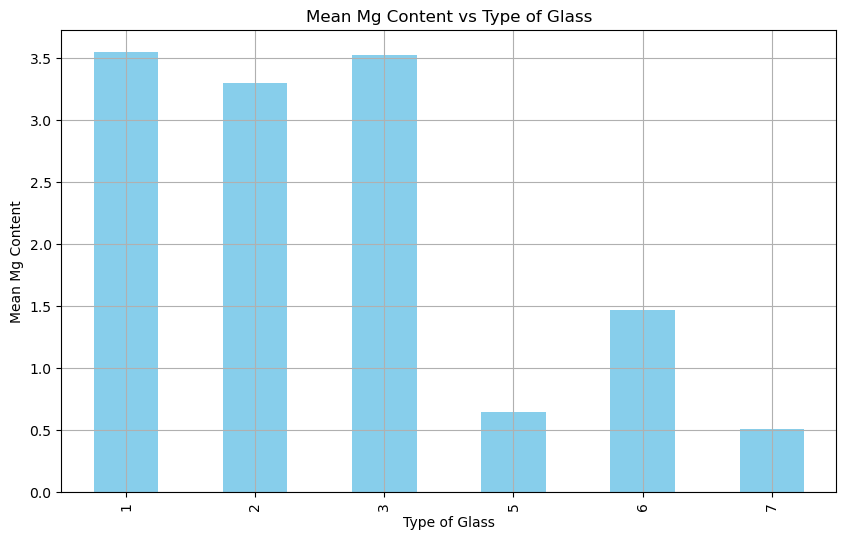

Descriptive statistics for Al:
 count    194.000000
mean       1.422732
std        0.443786
min        0.290000
25%        1.190000
50%        1.360000
75%        1.602500
max        2.880000
Name: Al, dtype: float64 



Descriptive statistics for Si:
 count    194.000000
mean      72.720619
std        0.584852
min       70.570000
25%       72.372500
50%       72.820000
75%       73.087500
max       74.550000
Name: Si, dtype: float64 



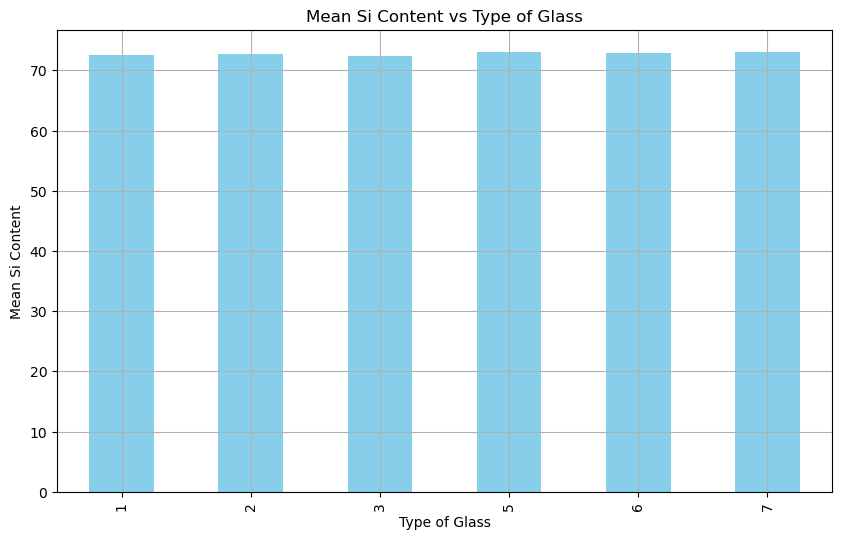

Descriptive statistics for K:
 count    194.000000
mean       0.431546
std        0.282287
min        0.000000
25%        0.132500
50%        0.555000
75%        0.600000
max        1.760000
Name: K, dtype: float64 



Descriptive statistics for Ca:
 count    194.000000
mean       8.824639
std        0.989154
min        5.430000
25%        8.240000
50%        8.585000
75%        9.077500
max       12.500000
Name: Ca, dtype: float64 



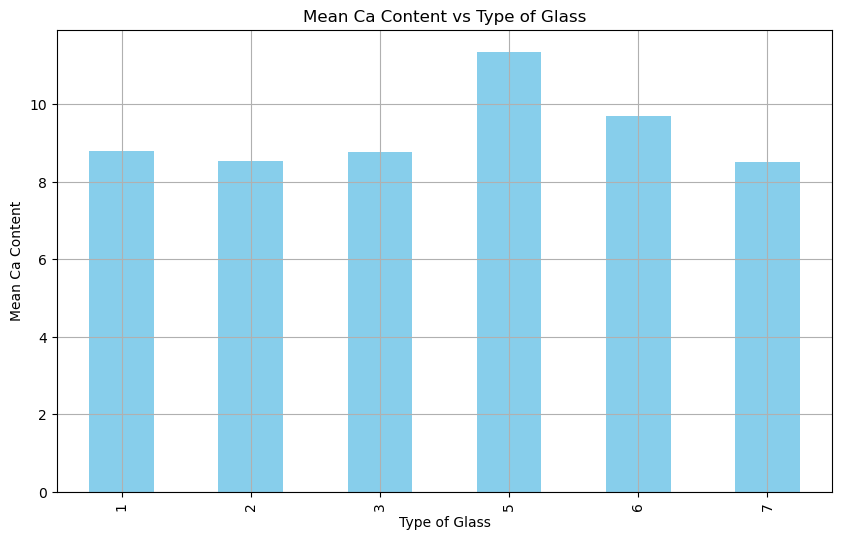

Descriptive statistics for Ba:
 count    194.000000
mean       0.123351
std        0.357125
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.640000
Name: Ba, dtype: float64 



Descriptive statistics for Fe:
 count    194.000000
mean       0.051598
std        0.085782
min        0.000000
25%        0.000000
50%        0.000000
75%        0.090000
max        0.320000
Name: Fe, dtype: float64 



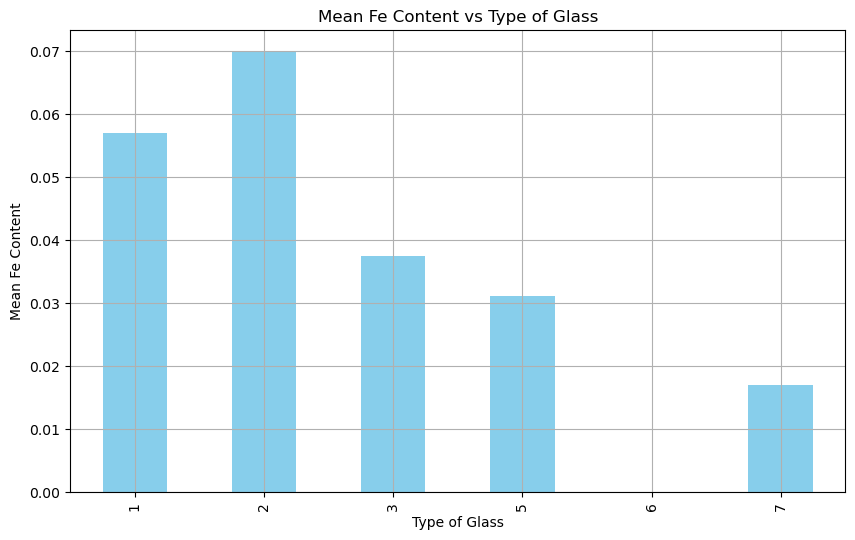

In [16]:
#selecting columns for descriptive analysis 
columns_to_explore = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']

# Printing descriptive statistics for each column and creating bar plots
for col in columns_to_explore:
    if col != 'Type_of_glass':
        # Descriptive statistics for the entire column
        descriptive_stats = df[col].describe()
        print(f"Descriptive statistics for {col}:\n", descriptive_stats, "\n")
        
        # Bar Plot for each column
        plt.figure(figsize=(10, 6))
        df.groupby('Type_of_glass')[col].mean().plot(kind='bar', color='skyblue')
        plt.xlabel('Type of Glass')
        plt.ylabel(f'Mean {col} Content')
        plt.title(f'Mean {col} Content vs Type of Glass')
        plt.grid(True)
        plt.show()


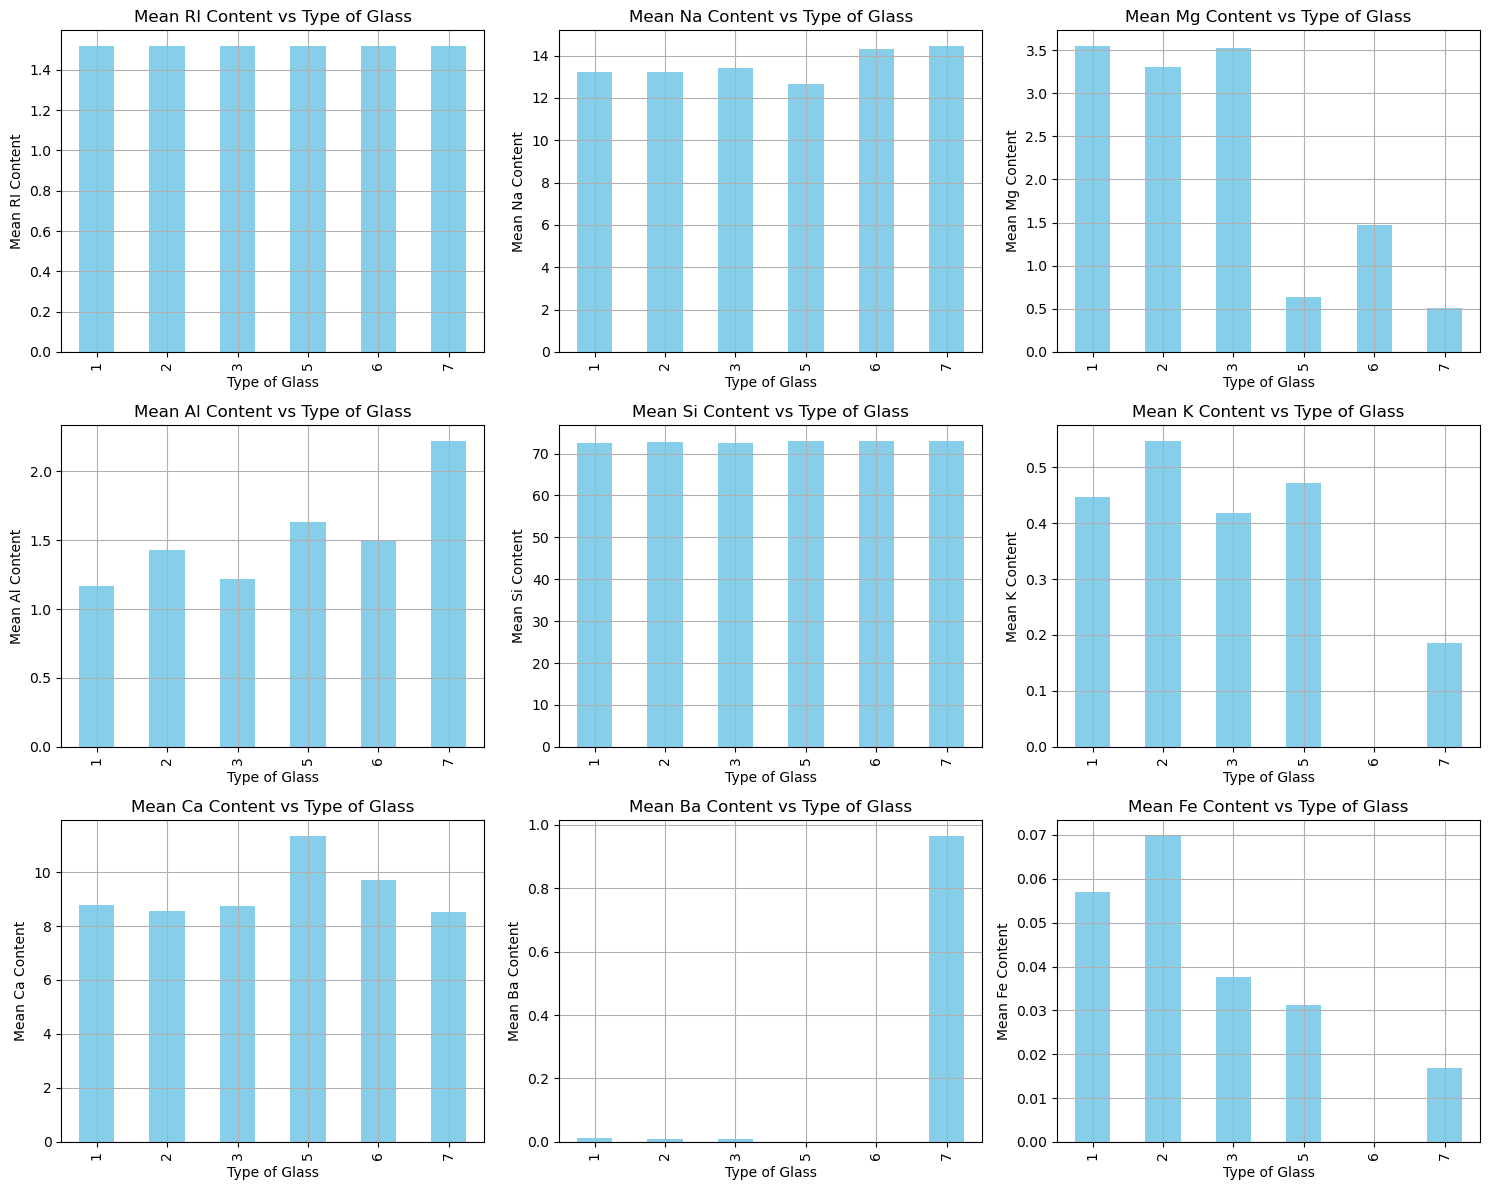

In [17]:
#this block prints all the graph in one frame using grid.

# List of columns to explore
columns_to_explore = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Determining the number of rows and columns for the grid
num_columns = len(columns_to_explore)
num_rows = (num_columns + 2) // 3  # Adjust the number of columns per row

# Creating a grid of subplots 
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

axes = axes.flatten()

# Generating bar plots for each column
for i, column in enumerate(columns_to_explore):
    ax = axes[i]
    df.groupby('Type_of_glass')[column].mean().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_xlabel('Type of Glass')
    ax.set_ylabel(f'Mean {column} Content')
    ax.set_title(f'Mean {column} Content vs Type of Glass')
    ax.grid(True)

# Removing empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout
plt.tight_layout()
plt.show()


In [18]:
# Counting the occurrences of each type of glass
type_counts = df['Type_of_glass'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Types of Glass')
plt.axis('equal')  # Equal aspect ratio ensures that pie is as a circle.
plt.show()


## Task 2.2

In [19]:
# Heatmap 

data = df.drop(columns=['Type_of_glass'])

plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
sns.scatterplot(x='RI', y='Ca', data=df)
plt.xlabel('Ca')
plt.ylabel('RI')
plt.title('RI vs. Ca')
plt.show()

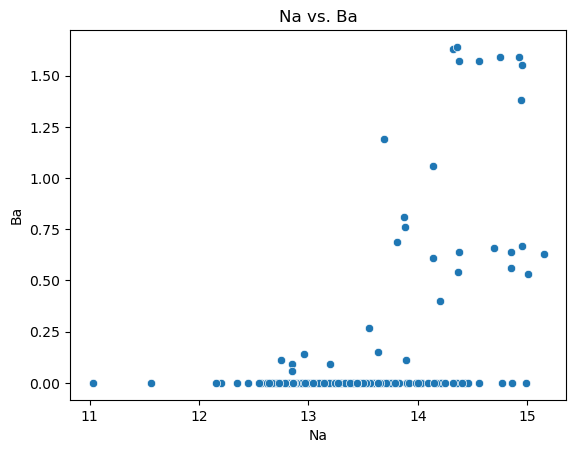

In [21]:
sns.scatterplot(x='Na', y='Ba', data=df)
plt.xlabel('Na')
plt.ylabel('Ba')
plt.title('Na vs. Ba')
plt.show()

In [22]:
sns.scatterplot(x='Al', y='Ba', data=df)
plt.xlabel('Al')
plt.ylabel('Ba')
plt.title('Al vs. Ba')
plt.show()

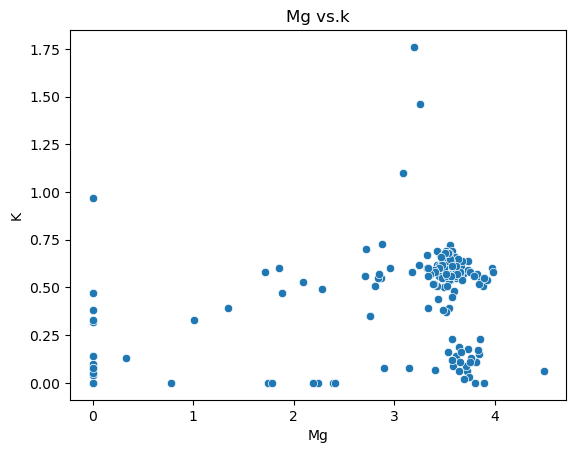

In [23]:
sns.scatterplot(x='Mg', y='K', data=df)
plt.xlabel('Mg')
plt.ylabel('K')
plt.title('Mg vs.k')
plt.show()

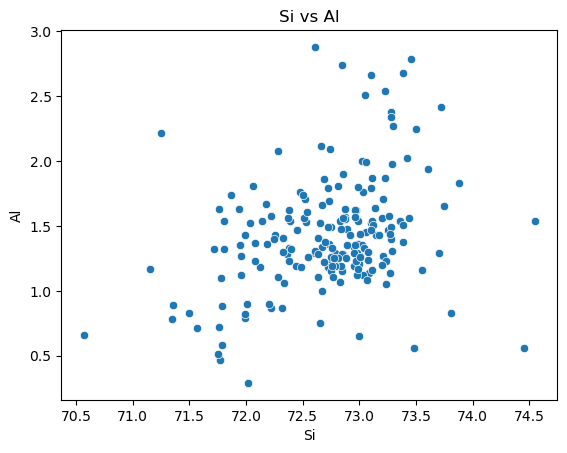

In [24]:
sns.scatterplot(x='Si', y='Al', data=df)
plt.xlabel('Si')
plt.ylabel('Al')
plt.title('Si vs Al')
plt.show()

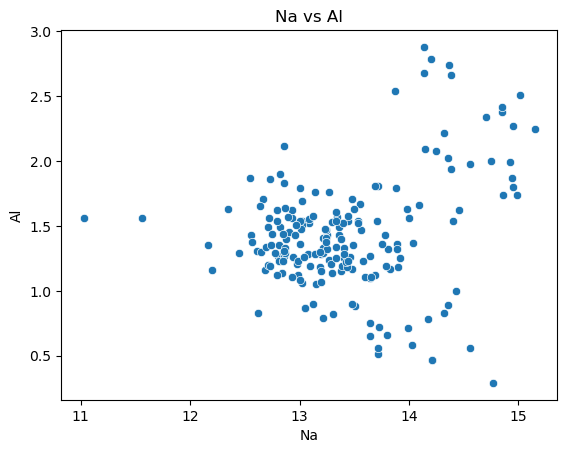

In [25]:
sns.scatterplot(x='Na', y='Al', data=df)
plt.xlabel('Na')
plt.ylabel('Al')
plt.title('Na vs Al')
plt.show()

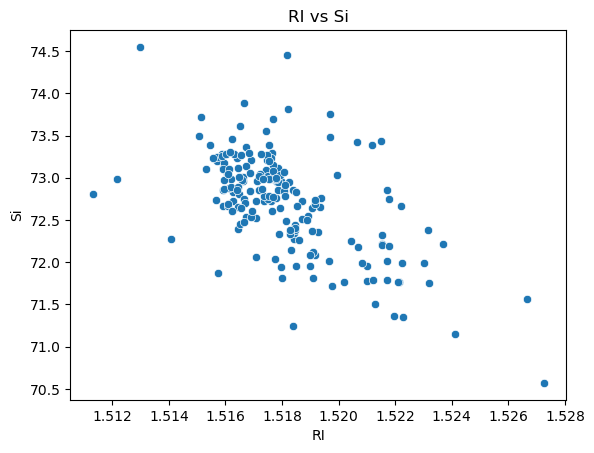

In [26]:
sns.scatterplot(x='RI', y='Si', data=df)
plt.xlabel('RI')
plt.ylabel('Si')
plt.title('RI vs Si')
plt.show()

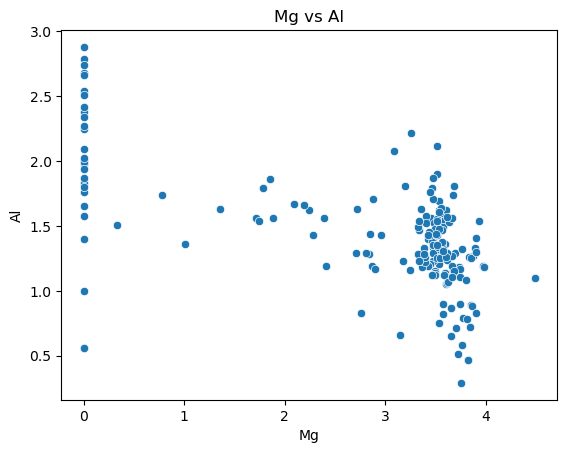

In [27]:
sns.scatterplot(x='Mg', y='Al', data=df)
plt.xlabel('Mg')
plt.ylabel('Al')
plt.title('Mg vs Al')
plt.show()

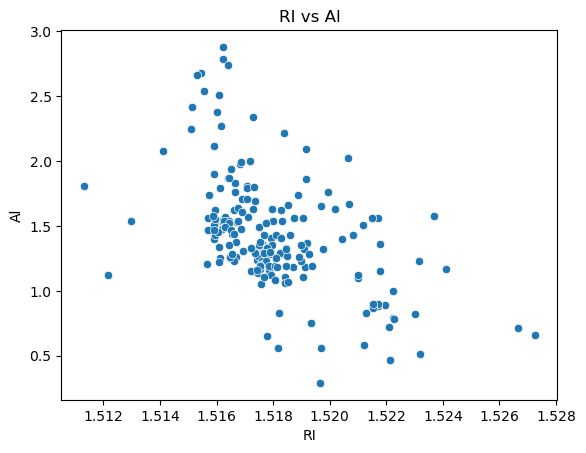

In [28]:
sns.scatterplot(x='RI', y='Al', data=df)
plt.xlabel('RI')
plt.ylabel('Al')
plt.title('RI vs Al')
plt.show()

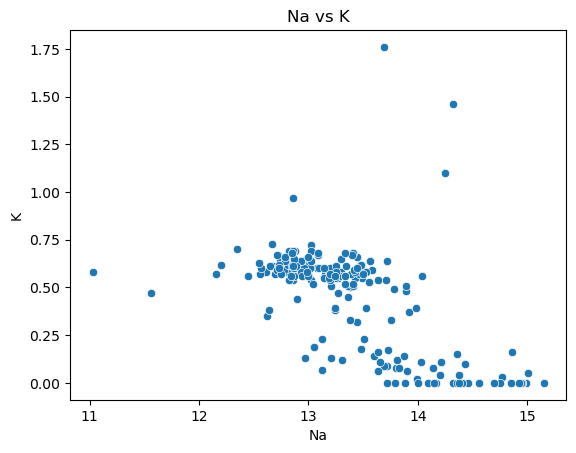

In [29]:
sns.scatterplot(x='Na', y='K', data=df)
plt.xlabel('Na')
plt.ylabel('K')
plt.title('Na vs K')
plt.show()

## Task 3

In [30]:
# Selecting features  and target variable 
X = df.drop('Type_of_glass', axis=1)       #Removing Type_of_glass from features as it is target variable
y = df['Type_of_glass']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (155, 9)
Shape of X_test: (39, 9)
Shape of y_train: (155,)
Shape of y_test: (39,)


In [31]:

# Creating the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation

# Fitting the model on the entire training data
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

# Printing the cross-validation scores
print("\nCross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Generating classification report
print("\nClassification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree Classifier: 0.6410256410256411

Cross-Validation Scores: [0.58064516 0.64516129 0.74193548 0.74193548 0.83870968]
Mean Cross-Validation Score: 0.7096774193548387

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.89      0.53      0.67        15
           3       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         2
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.64        39
   macro avg       0.62      0.62      0.56        39
weighted avg       0.70      0.64      0.62        39



In [32]:

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initializing variables to store the best parameters and accuracy
best_accuracy = 0
best_n_neighbors = None
best_weights = None

# Defining the range of hyperparameters to search over
n_neighbors_range = range(1, 21)  # Test n_neighbors from 1 to 20
weights_range = ['uniform', 'distance']  # Test both uniform and distance weights

# Initializing the KNN Classifier
knn_classifier = KNeighborsClassifier()

# Performing hill climbing model selection
for n_neighbors in n_neighbors_range:
    for weights in weights_range:
        # Set hyperparameters
        knn_classifier.set_params(n_neighbors=n_neighbors, weights=weights)
        # Train the model
        knn_classifier.fit(X_train, y_train)
        # Predict on the validation set
        y_pred_val = knn_classifier.predict(X_val)
        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred_val)
        # Update best parameters if accuracy is improved
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_neighbors = n_neighbors
            best_weights = weights

# Training the best KNN model on the full training set
knn_classifier.set_params(n_neighbors=best_n_neighbors, weights=best_weights)
knn_classifier.fit(X_train, y_train)

# Predicting on the test set using the best model
y_pred_knn_optimized = knn_classifier.predict(X_test)

# Calculating accuracy of the optimized KNN Classifier
accuracy_knn_optimized = accuracy_score(y_test, y_pred_knn_optimized)
print("Accuracy of Optimized KNN Classifier:", accuracy_knn_optimized)

print("\nClassification Report for Optimized KNN Classifier:")
print(classification_report(y_test, y_pred_knn_optimized, zero_division=1))

Accuracy of Optimized KNN Classifier: 0.717948717948718

Classification Report for Optimized KNN Classifier:
              precision    recall  f1-score   support

           1       0.60      0.92      0.73        13
           2       0.83      0.67      0.74        15
           3       1.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.72        39
   macro avg       0.86      0.65      0.64        39
weighted avg       0.78      0.72      0.68        39



In [33]:
print("Accuracy of Decision Tree Classifier:", accuracy_dt)
print("Accuracy of KNN Classifier:", accuracy_knn_optimized)

Accuracy of Decision Tree Classifier: 0.6410256410256411
Accuracy of KNN Classifier: 0.717948717948718
